## WebMD cleaning data

In [2]:
import pandas as pd
import numpy as np

In [8]:
webmd=pd.read_csv("webmd_f.csv")
webmd.columns = ["reason", "name","effectiveness","ease_to_use","comment"]
webmd

,reason,name,effectiveness,ease_to_use,comment
0,Depression,5-HTP,4,4,(Part 2) Today is the 4th day of taking 5-HTP....
1,Anxiety,5-HTP,5,5,Effectively replaced my SSRI with 5 HTP. I hav...
2,Anxiety,5-HTP,5,4,I started taking 5-HTP for depression and anxi...
3,Menopausal symptoms,5-HTP,5,5,"Taking 200mg tabs, one in the morning and one ..."
4,Depression,5-HTP,5,5,My grandmother gave me these to try. I was moo...
5,Fibromyalgia,5-HTP,1,1,"Every time I have tried 5 http, I have been na..."
6,Anxiety,5-HTP,5,5,I feel like a new person since starting 5htp 2...
7,Other,5-HTP,1,5,Took for 2 days in a combo herb supplement for...
8,Depression,5-HTP,4,4,I had been in a relatively light but still ver...
9,Depression,5-HTP,4,4,i have been on this for about 4 days and so fa...


In [51]:
webmd.to_csv("webmd.csv",index=False)

In [89]:
df=pd.read_csv("webmd.csv")

In [90]:
df_nc =df[["name","reason","effectiveness","ease_to_use"]]

In [95]:
df_name = df_nc['name'].value_counts().head(12)

In [206]:
df_name[]

MELATONIN           465
5-HTP               377
VITAMIN D           337
COLLOIDAL SILVER    308
MAGNESIUM           285
HYALURONIC ACID     221
FISH OIL            201
BIOTIN              191
KRILL OIL           190
MORINGA             146
VALERIAN            141
ASHWAGANDHA         137
Name: name, dtype: int64

In [114]:
df_re = df_nc[df_nc.groupby('reason')['reason'].transform('size') > 50]

df_name = df_nc[df_nc.groupby('name')['name'].transform('size') > 100]
df_name['name'].value_counts().head(12)

MELATONIN           465
5-HTP               377
VITAMIN D           337
COLLOIDAL SILVER    308
MAGNESIUM           285
HYALURONIC ACID     221
FISH OIL            201
BIOTIN              191
KRILL OIL           190
MORINGA             146
VALERIAN            141
ASHWAGANDHA         137
Name: name, dtype: int64

In [222]:
df_name.groupby("name")["reason"].value_counts()

name              reason                   
5-HTP             Depression                    99
                  Anxiety                       89
                  Other                         62
                  General Health & Wellness     31
                  Fibromyalgia                  21
                  Weight loss                   15
                  Insomnia                       8
                  Overweight                     7
ASHWAGANDHA       Anxiety                       43
                  General Health & Wellness     38
                  Other                         33
                  Arthritis                      7
                  Stress                         5
                  Diabetes                       2
                  Fatigue                        2
                  ADHD                           1
                  Cholesterol                    1
COLLOIDAL SILVER  General Health & Wellness    184
                  Other               

In [229]:
df_re.groupby("name")["reason"].value_counts(normalize=True)

name                reason                   
5-HTP               Depression                   0.298193
                    Anxiety                      0.268072
                    Other                        0.186747
                    General Health & Wellness    0.093373
                    Fibromyalgia                 0.063253
                    Weight loss                  0.045181
                    Insomnia                     0.024096
                    Overweight                   0.021084
ACTIVATED CHARCOAL  Other                        0.800000
                    General Health & Wellness    0.150000
                    Cholesterol                  0.050000
ASHWAGANDHA         Anxiety                      0.325758
                    General Health & Wellness    0.287879
                    Other                        0.250000
                    Arthritis                    0.053030
                    Stress                       0.037879
                    Diabet

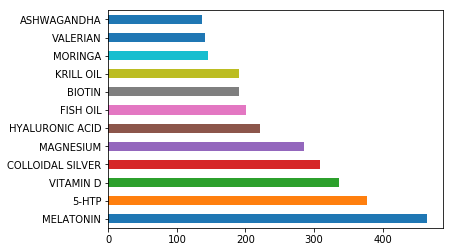

In [116]:

df_name['name'].value_counts().sort_values(ascending=False).plot.barh()

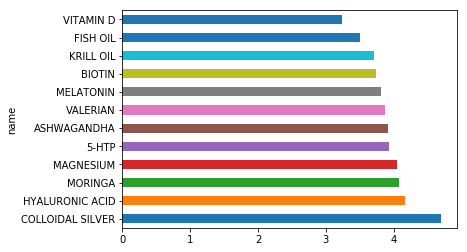

In [184]:
df_name.groupby('name')["effectiveness"].mean().sort_values(ascending = False).plot.barh()

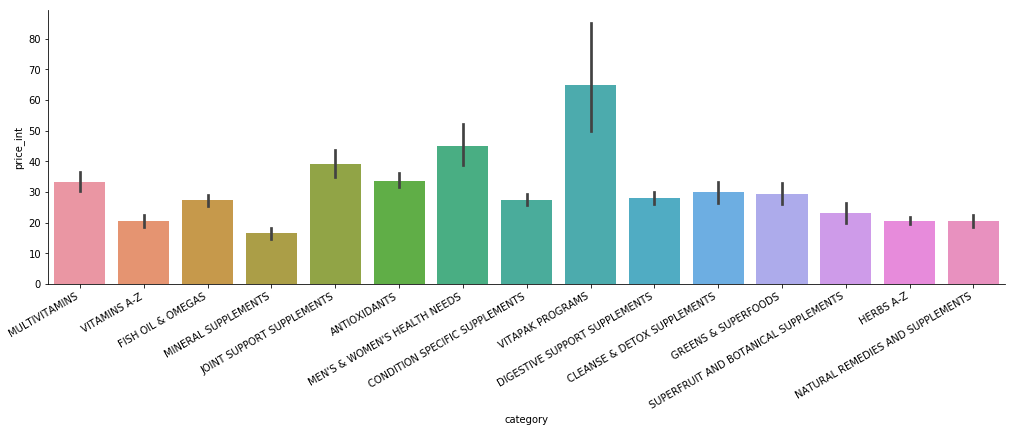

In [235]:
g =sns.catplot(x="category", y="price_int", data=gnc, kind="bar", aspect=3)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
g.fig.autofmt_xdate()
plt.show()

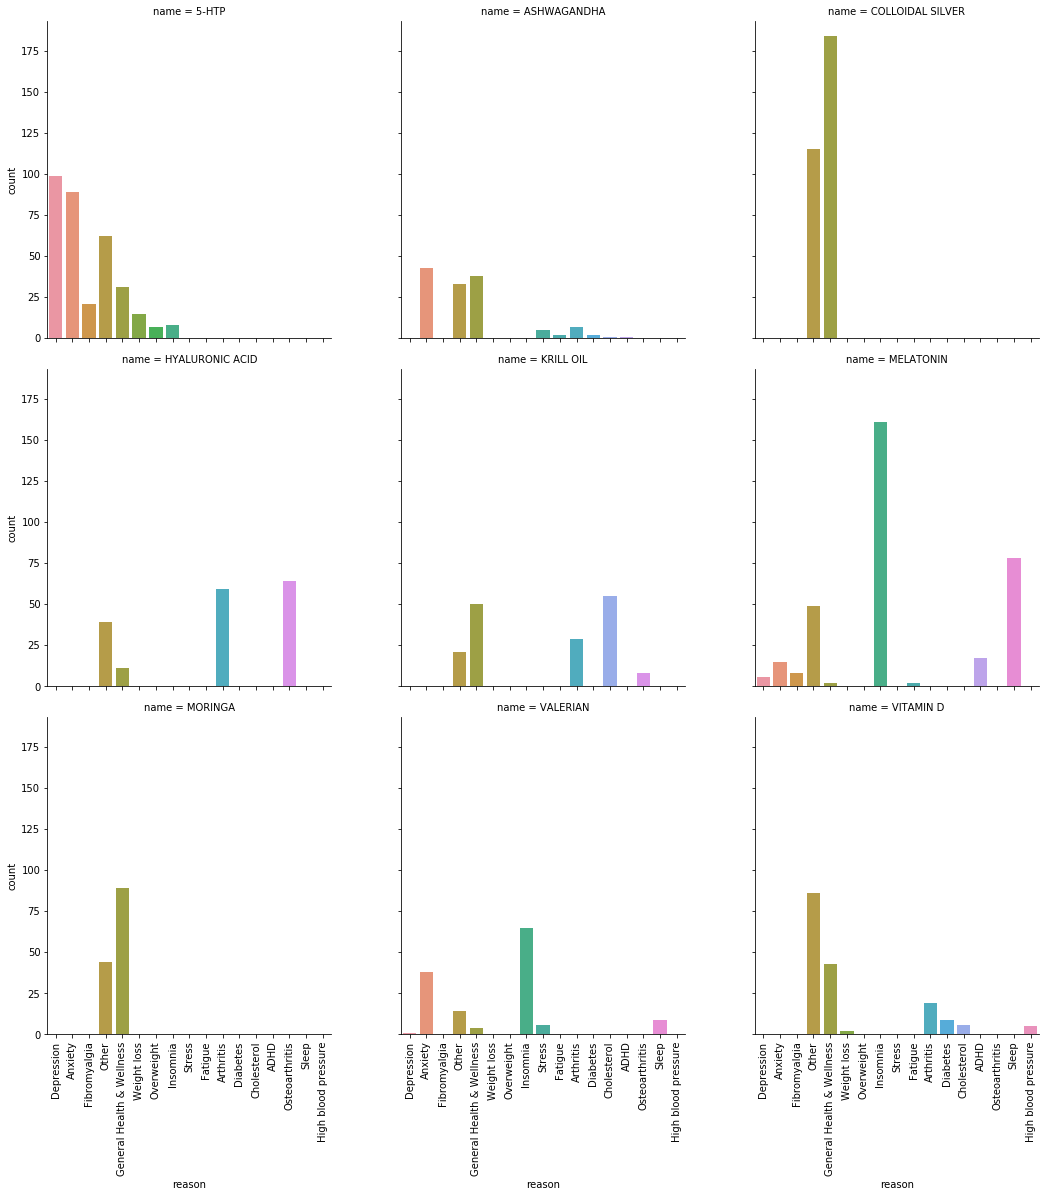

In [238]:
g = sns.catplot(x="reason", label='cause',col="name",data=df_name,kind="count",col_wrap=3)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
plt.show()

 - long tail observed. focused on the first top 10

In [98]:
df_re['reason'].value_counts()

Other                        1373
General Health & Wellness    1254
Anxiety                       256
Insomnia                      240
Arthritis                     184
Weight loss                   171
Depression                    169
Diabetes                      137
Cholesterol                   119
High blood pressure           100
Sleep                          92
Osteoarthritis                 84
Hair loss                      80
Stress                         64
Erectile dysfunction (ED)      64
Overweight                     60
Fibromyalgia                   56
ADHD                           52
Fatigue                        52
Name: reason, dtype: int64

## Data visualisation

In [14]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [107]:
len(df_nc["reason"].value_counts())

362

In [109]:
len(df_nc.groupby("reason").filter(lambda x: len(x) ==1))

95

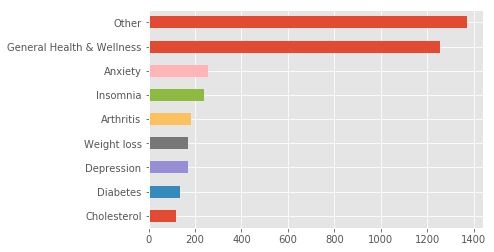

In [15]:
df_re["reason"].value_counts().sort_values(ascending=True).plot.barh()

- category other is the mostly rated by reviewers.
- check the other reasons by analysing comments using world cloud. 

Text(0,0.5,'ease_to_use')

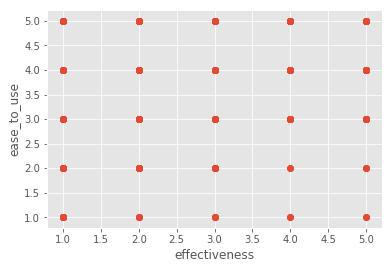

In [ ]:
group.agg(['mean', 'std'])

## GNC data Cleaning

In [10]:
gnc=pd.read_csv("gnc_test.csv" ,encoding ="cp1252")

In [11]:
gnc["product"]=gnc["product"].str.replace("\??","")
gnc.sample(10)

,category,product,rate,price,serving,price/serving
1437,MEN'S & WOMEN'S HEALTH NEEDS,Daily Wellness Company FertilityBlend for Men,5,$36.99,30.0,1.2
85,MULTIVITAMINS,GNC AMP Men's Ripped Vitapak Program,0,$69.99,NaN,NaN
967,MINERAL SUPPLEMENTS,Carlson Liquid Magnesium 400 mg,5,$29.99,250.0,0.1
1088,JOINT SUPPORT SUPPLEMENTS,Nordic Naturals Complete Omega-369,5,$28.89,60.0,0.5
283,VITAMINS A-Z,Solgar Sublingual Methylcobalamin Vitamin (B 1...,3,$10.99,60.0,0.2
1335,ANTIOXIDANTS,Life Extension Skin Restoring Phytoceramides,3,$24.99,30.0,0.8
1009,JOINT SUPPORT SUPPLEMENTS,Nordic Naturals Ultimate Mega Junior,0,$25.49,45.0,0.6
751,FISH OIL & OMEGAS,Nature's Answer Pumpkin 2000mg,0,$14.99,15.0,1.0
174,MULTIVITAMINS,Solgar Formula VM - 75 - Iron Free,0,$52.70,180.0,0.3
1180,JOINT SUPPORT SUPPLEMENTS,Life Extension Glucosamine-Chondroitin,0,$37.99,100.0,0.4


In [100]:
gnc.columns

Index(['category', 'product', 'rate', 'price', 'serving', 'price/serving',
       'gender', 'price_int'],
      dtype='object')

In [73]:
gnc["gender"]=""

gnc.loc[gnc["product"].str.contains("Men"),"gender"]="Men"
gnc.loc[gnc["product"].str.contains("Women|Prenatal"),"gender"]="Women"
gnc.loc[gnc["product"].str.contains("Kids|Teen"),"gender"]="Kids"
gnc.head()
gnc["price_int"]= gnc["price"].str.replace("$","").astype(float)

In [74]:
gnc.to_csv("gnc_01.csv",index=False)

In [105]:
herb = pd.read_csv("herb_natural.csv")
herb.columns =['category', 'product', 'rate', 'price', 'serving', 'price/serving']
herb["gender"]=""

herb.loc[herb["product"].str.contains("Men"),"gender"]="Men"
herb.loc[herb["product"].str.contains("Women|Prenatal"),"gender"]="Women"
herb.loc[herb["product"].str.contains("Kids|Teen"),"gender"]="Kids"
herb.head()
herb["price_int"]= herb["price"].str.replace("$","").astype(float)
herb.head()

,category,product,rate,price,serving,price/serving,gender,price_int
0,HERBS A-E,Nature's Way® Echinacea,0,$17.99,60.0,0.3,,17.99
1,HERBS A-E,GNC Herbal Plus® Cinnamon Bark 500 mg,5,$23.99,200.0,0.1,,23.99
2,HERBS A-E,GNC Herbal Plus® Cat's Claw Bark 500mg,5,$7.99,100.0,0.1,,7.99
3,HERBS A-E,GNC Herbal Plus® Astragalus 500 mg,5,$9.99,100.0,0.1,,9.99
4,HERBS A-E,GNC Herbal Plus® Cranberry Fruit 500MG,5,$17.99,100.0,0.2,,17.99


In [106]:
gnc = gnc.append(herb)

In [24]:
gnc = gnc.drop_duplicates(subset='product', keep="first")
gnc.sample(10)

,category,product,rate,price,serving,price/serving,gender,price_int
0,MULTIVITAMINS,GNC Kids Multi Gummy,4,$12.99,60.0,0.2,Kids,12.99
1,MULTIVITAMINS,GNC Women's Ultra Mega Gummy Multivitamin - Mi...,4,$12.99,60.0,0.2,Women,12.99
2,MULTIVITAMINS,GNC Women's Ultra Mega 50 Plus,4,$39.99,60.0,0.7,Women,39.99
3,MULTIVITAMINS,GNC Women's ULTRA MEGA 50 Plus One Daily,4,$19.99,60.0,0.3,Women,19.99
4,MULTIVITAMINS,GNC Mega Men 50 Plus One Daily,4,$19.99,60.0,0.3,Men,19.99
5,MULTIVITAMINS,GNC milestones Kids Bone Health Gummy € Assort...,5,$14.99,60.0,0.2,Kids,14.99
6,MULTIVITAMINS,GNC Mega Men Sport,4,$37.99,90.0,0.4,Men,37.99
7,MULTIVITAMINS,GNC Mega Men 50 Plus Vitapak Program,4,$44.99,30.0,1.5,Men,44.99
8,MULTIVITAMINS,Revolution Nutrition Vitamin Cooler,0,$39.99,25.0,1.6,NaN,39.99
9,MULTIVITAMINS,GNC Mega Men Joint Vitapak Program,4,$44.99,30.0,1.5,Men,44.99


In [25]:
gnc.loc[gnc["category"].str.contains("HERBS"),"category"]="HERBS A-Z"

In [26]:
gnc.to_csv("gnc_02.csv",index=False)

In [ ]:
gnc = pd.read_csv("gnc_02.csv")

In [152]:
gnc.loc[gnc["product"].str.contains("Melatonin"),"Ingredient"]="Melatonin"
gnc.loc[gnc["product"].str.contains("HTP"),"Ingredient"]="5-HTP"
gnc.loc[gnc["product"].str.contains("Vitamin D"),"Ingredient"]="Vitamin D"
gnc.loc[gnc["product"].str.contains("Vitamin A"),"Ingredient"]="Vitamin A"
gnc.loc[gnc["product"].str.contains("Magnesium"),"Ingredient"]="Magnesium"
gnc.loc[gnc["product"].str.contains("Hyaluronic Acid"),"Ingredient"]="Hyaluronic Acid"
gnc.loc[gnc["product"].str.contains("Biotin"),"Ingredient"]="Biotin"
gnc.loc[gnc["product"].str.contains("Fish Oil"),"Ingredient"]="Fish Oil"
gnc.loc[gnc["product"].str.contains("Moringa"),"Ingredient"]="Moringa"
gnc.loc[gnc["product"].str.contains("Krill Oil"),"Ingredient"]="Krill Oil"
gnc.loc[gnc["product"].str.contains("Valerian"),"Ingredient"]="Valerian"
gnc.loc[gnc["product"].str.contains("Ashwagandha"),"Ingredient"]="Ashwagandha"
gnc.loc[gnc["product"].str.contains("Colloida"),"Ingredient"]="Colloidal Silver"


In [151]:
gnc.loc[gnc["product"].str.contains("Lutein"),"Ingredient"]="Lutein"
gnc.loc[gnc["product"].str.contains("Folic"),"Ingredient"]="Folic Acid"
gnc.loc[gnc["product"].str.contains("Cod Liver"),"Ingredient"]="Cod Liver Oil"
gnc.loc[gnc["product"].str.contains("Cal"),"Ingredient"]="Calcium"
gnc.loc[gnc["product"].str.contains("Iron"),"Ingredient"]="Iron"
gnc.loc[gnc["product"].str.contains("Zinc"),"Ingredient"]="Zinc"
gnc.loc[gnc["product"].str.contains("Vitamin E"),"Ingredient"]="Vitamin E"
gnc.loc[gnc["product"].str.contains("Charcoal"),"Ingredient"]="Charcoal"

In [185]:
gnc.loc[gnc["product"].str.contains("Gotu"),"Ingredient"]="Gotu Kola"
gnc.loc[gnc["product"].str.contains("Ginger"),"Ingredient"]="Ginger"

In [155]:
gnc.loc[gnc["category"].str.contains("MULTIVI"),"Ingredient"]="Multivitamin"

In [156]:
gnc.head()

,category,product,rate,price,serving,price/serving,gender,price_int,Ingredient
0,MULTIVITAMINS,GNC Kids Multi Gummy,4,$12.99,60.0,0.2,Kids,12.99,Multivitamin
1,MULTIVITAMINS,GNC Women's Ultra Mega Gummy Multivitamin - Mi...,4,$12.99,60.0,0.2,Women,12.99,Multivitamin
2,MULTIVITAMINS,GNC Women's Ultra Mega 50 Plus,4,$39.99,60.0,0.7,Women,39.99,Multivitamin
3,MULTIVITAMINS,GNC Women's ULTRA MEGA 50 Plus One Daily,4,$19.99,60.0,0.3,Women,19.99,Multivitamin
4,MULTIVITAMINS,GNC Mega Men 50 Plus One Daily,4,$19.99,60.0,0.3,Men,19.99,Multivitamin


In [182]:
gnc.loc[gnc["product"].str.contains("Propolis")]

,category,product,rate,price,serving,price/serving,gender,price_int,Ingredient


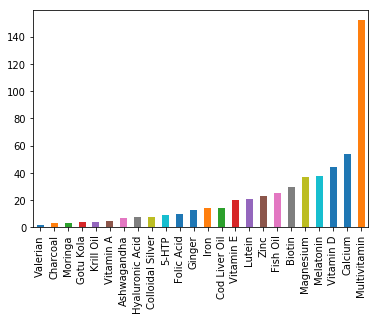

In [186]:
gnc["Ingredient"].value_counts().sort_values(ascending=True).plot.bar()

### GNC plots

In [117]:
gnc = pd.read_csv("gnc_02.csv")


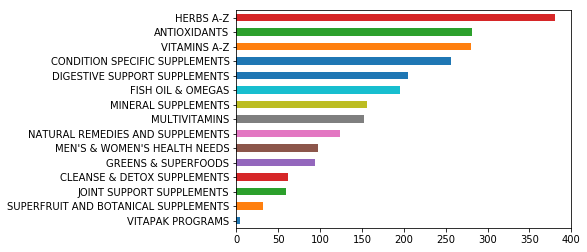

In [195]:
gnc["category"].value_counts().sort_values(ascending=True).plot.barh()

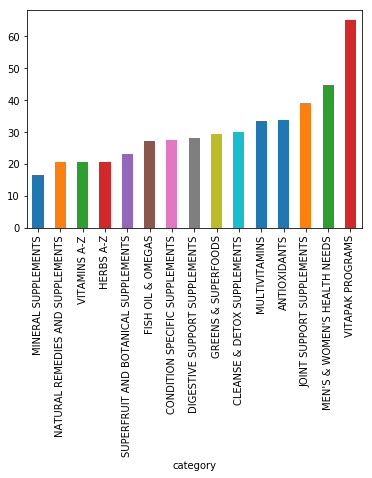

In [197]:
gnc.groupby("category")['price_int'].mean().sort_values(ascending=True).plot.bar()

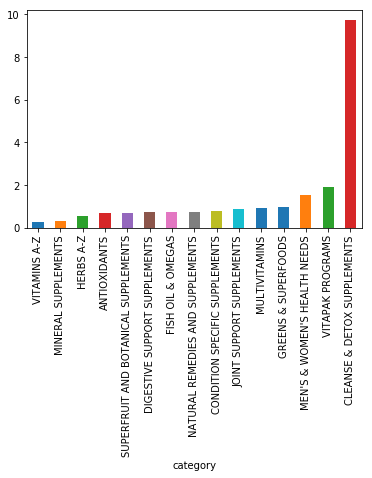

In [188]:
gnc.groupby("category")['price/serving'].mean().sort_values(ascending=True).plot.barh()

- detox supplements are occasionally used, this can't be compared with other everyday use items.

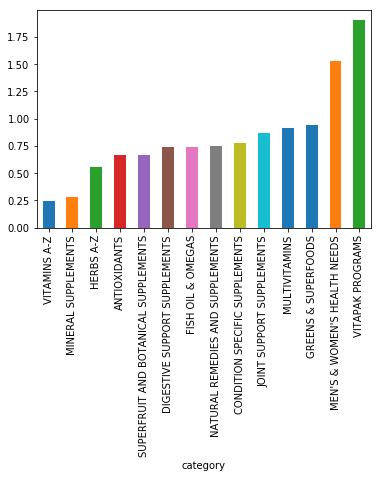

In [194]:
nodetox = gnc.loc[gnc["category"] != "CLEANSE & DETOX SUPPLEMENTS"]
nodetox.groupby("category")['price/serving'].mean().sort_values(ascending=True).plot.bar()

In [201]:
gnc["Ingredient"].value_counts()

Multivitamin        152
Calcium              54
Vitamin D            44
Melatonin            38
Magnesium            37
Biotin               30
Fish Oil             25
Zinc                 23
Lutein               21
Vitamin E            20
Cod Liver Oil        14
Iron                 14
Ginger               13
Folic Acid           10
5-HTP                 9
Colloidal Silver      8
Hyaluronic Acid       8
Ashwagandha           7
Vitamin A             5
Krill Oil             4
Gotu Kola             4
Charcoal              3
Moringa               3
Valerian              2
Name: Ingredient, dtype: int64

In [202]:
gnc_12 = gnc[gnc.groupby("Ingredient")['Ingredient'].transform('size') > 13]

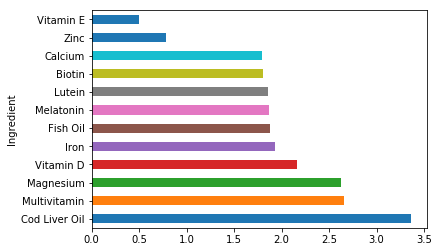

In [205]:
gnc_rate = gnc.loc[gnc['rate']>=4]

gnc_12.groupby("Ingredient")['rate'].mean().sort_values(ascending=False).plot.barh()

In [ ]:
gnc.groupby("category")['price/serving'].mean().sort_values(ascending=True).plot.bar()

In [8]:
group.agg(['mean', 'std'])

NameError: name 'group' is not defined

In [9]:
gnc["price_int"]= gnc["price"].str.replace("$","").astype(float)

gnc.head()

,category,product,rate,price,serving,price/serving,gender,price_int
0,MULTIVITAMINS,GNC Kids Multi Gummy,4,$12.99,60.0,0.2,Kids,12.99
1,MULTIVITAMINS,GNC Women's Ultra Mega Gummy Multivitamin - Mi...,4,$12.99,60.0,0.2,Women,12.99
2,MULTIVITAMINS,GNC Women's Ultra Mega 50 Plus,4,$39.99,60.0,0.7,Women,39.99
3,MULTIVITAMINS,GNC Women's ULTRA MEGA 50 Plus One Daily,4,$19.99,60.0,0.3,Women,19.99
4,MULTIVITAMINS,GNC Mega Men 50 Plus One Daily,4,$19.99,60.0,0.3,Men,19.99


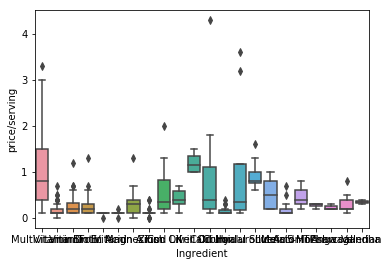

In [160]:
sns.boxplot(x='Ingredient', y='price/serving', data=gnc)

Text(0,0.5,'Price')

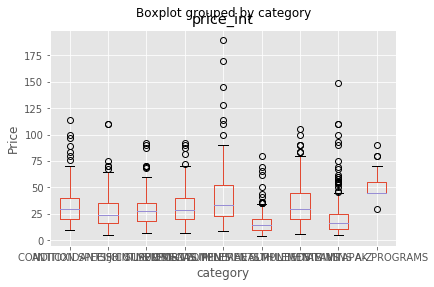

In [20]:
budget_df = df_price_range.copy()
budget_df.boxplot(by='category', column='price_int')
#lambda x: (np.abs(x-x.mean())/x.std() <3).all(axis=1)
mask=(abs(budget_df.price_int-budget_df.price_int.mean())/budget_df.price_int.std())<100
budget_df=budget_df.loc[mask,:]
plt.ylabel('Price')

In [110]:
import seaborn as sns

C:\Users\Soo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


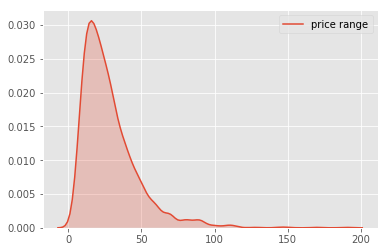

In [25]:
sns.kdeplot(gnc['price_int'], shade=True, label='price range')

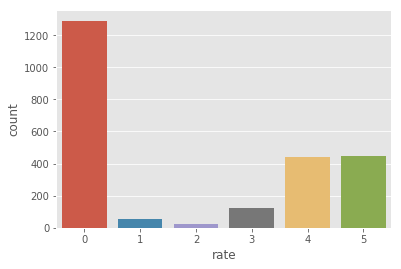

In [35]:
sns.countplot(gnc['rate'], label='rating')

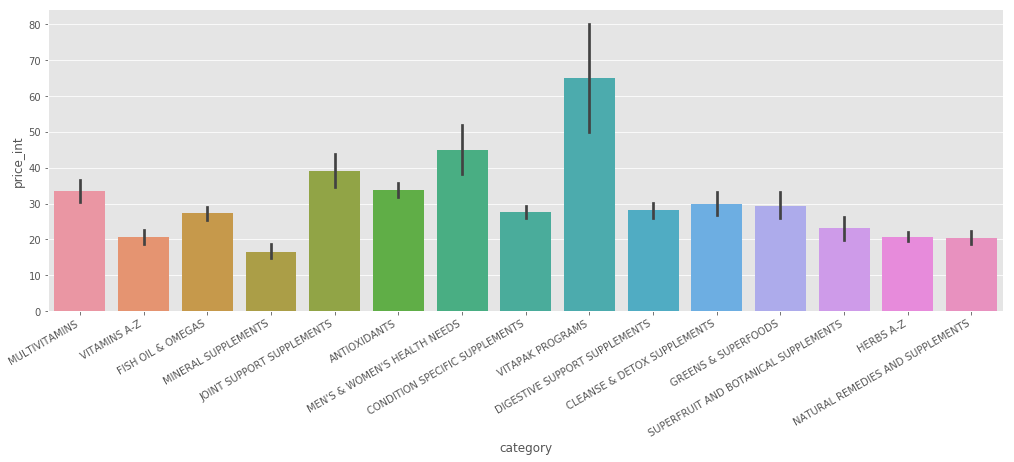

In [55]:
g =sns.catplot(x="category", y="price_int", data=gnc, kind="bar", aspect=3)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.setp(g.ax.get_xticklabels(), rotation=30,ha="right")
plt.show()

In [58]:
sns.barplot("price_int", "category", gnc, hue="gender", palette={"Men": "b", "Women": "r", "Kids" :"g"})

TypeError: barplot() got multiple values for argument 'hue'

In [ ]:
ing = ['5-HTP', 'ACTIVATED CHARCOAL', 'ASHWAGANDHA', 'ASTAXANTHIN', 'ASTRAGALUS', 'BERBERINE', 'BIOTIN', 'BROMELAIN', 'CALCIUM', 'CHLORELLA', 'CHLOROPHYLL', 'CHOLINE', 'CHROMIUM', 'COCONUT OIL', 'COD LIVER OIL', 'COLLOIDAL SILVER', 'CONJUGATED LINOLEIC ACID', 'CORDYCEPS', 'CREATINE', 'DAMIANA', 'ECHINACEA', 'EMU OIL', 'EVENING PRIMROSE OIL', 'FENUGREEK', 'FISH OIL', 'FOLIC ACID', 'GABA (GAMMA-AMINOBUTYRIC ACID)', 'GARLIC', 'GINGER', 'GINKGO', 'GLUCOMANNAN', 'GLUTATHIONE', 'GOTU KOLA', 'HOLY BASIL', 'HORNY GOAT WEED', 'HYALURONIC ACID', 'INOSITOL', 'IODINE', 'IRON', 'KRILL OIL', 'L-ARGININE', 'L-CARNITINE', 'LECITHIN', 'LEMON BALM', 'LICORICE', 'LUTEIN', 'MACA', 'MAGNESIUM', 'MARITIME PINE', 'MELATONIN', 'MORINGA', 'OOLONG TEA', 'PHENYLALANINE', 'PHOSPHATIDYLSERINE', 'POTASSIUM', 'PROGESTERONE', 'PROPOLIS', 'PU-ERH TEA', 'QUERCETIN', 'RASPBERRY KETONE', 'RHODIOLA', 'ROYAL JELLY', 'SAW PALMETTO', 'SERRAPEPTASE', 'SLIPPERY ELM', 'TAURINE', 'TEA TREE OIL', 'TRIBULUS', 'VALERIAN', 'Vitamin A', 'Vitamin D', 'Vitamin E', 'WHEY PROTEIN', 'WITCH HAZEL', 'XYLITOL', 'YOHIMBE', 'ZINC']

In [176]:
gnc[gnc['product'].str.contains("Vitamin D")==True][]

,category,product,rate,price,serving,price/serving,gender,price_int
152,VITAMINS A-Z,GNC Vitamin D-3 1000 IU - Chocolate,5,$14.99,60.0,0.2,NaN,14.99
164,VITAMINS A-Z,GNC Vitamin D-3 2000 IU,4,$14.99,180.0,0.1,NaN,14.99
173,VITAMINS A-Z,GNC Vitamin D-3 1000 IU,4,$7.99,180.0,0.0,NaN,7.99
181,VITAMINS A-Z,GNC Vitamin D-3 5000 IU,4,$19.99,180.0,0.1,NaN,19.99
182,VITAMINS A-Z,Source Naturals Vitamin D-3,0,$14.99,200.0,0.1,NaN,14.99
193,VITAMINS A-Z,"Nature's Way Vitamin D3 5,000 IU",5,$16.49,240.0,0.1,NaN,16.49
194,VITAMINS A-Z,Carlson Cal-1000 with Vitamin D,3,$29.99,83.0,0.4,NaN,29.99
196,VITAMINS A-Z,Source Naturals Vitamin D-3 2 fl.oz,4,$10.99,369.0,0.0,NaN,10.99
202,VITAMINS A-Z,Jarrow Formulas Vitamin D3 1000 IU,0,$8.99,100.0,0.1,NaN,8.99
218,VITAMINS A-Z,"Now Vitamin D-3 5,000 IU",5,$22.99,240.0,0.1,NaN,22.99


In [ ]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('My Very Own Histogram')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

## NLP preparation

In [17]:
import nltk
import pandas as pd
import numpy as np 
import re
np.nan!=None

True

In [28]:
ndf = pd.read_csv("webmd.csv")
ndf.columns=["reason","name","effectiveness","easetouse","comment"]
ndf_wc = ndf.loc[ndf['reason']=="Other"]

In [29]:
# Fill na with empty string
ndf_wc['comment'] = ndf_wc['comment'].fillna('')
ndf_wc.head()

C:\Users\Soo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,reason,name,effectiveness,easetouse,comment
7,Other,5-HTP,1,5,Took for 2 days in a combo herb supplement for...
81,Other,5-HTP,3,5,I bought this drug to enhance lucid dreaming. ...
94,Other,5-HTP,1,4,I found it contributed to severe stomach pain ...
98,Other,5-HTP,5,5,I don't have dementia but came close enough to...
121,Other,5-HTP,3,5,-Being very hurtful and increasing hostile fee...


- most common ingredients in category in other

In [30]:
ndf_wc.groupby("reason")["name"].value_counts().head()

reason  name            
Other   COLLOIDAL SILVER    115
        VITAMIN D            86
        5-HTP                62
        SERRAPEPTASE         60
        MELATONIN            49
Name: name, dtype: int64

In [31]:
ndf_wc = ndf_wc.loc[ndf_wc['effectiveness']>=3]

In [32]:
print(sum(ndf_wc['comment'] == '') / ndf.shape[0])

0.007660661086678962


In [33]:
import re

In [34]:
# Convert all the string to lower cases
ndf_wc['comment'] = ndf_wc['comment'].str.lower()
# \s+ means all empty space (\n, \r, \t)
ndf_wc['comment'] = ndf_wc['comment'].apply(lambda x: re.sub('\s+', ' ', x)) # \s all empty spaces + repeat
 # We don't want empty string in our text
ndf_wc = ndf_wc.loc[ndf['comment'] != ""]


In [35]:
ndf_wc['comment'] = ndf_wc['comment'].apply(lambda x: re.sub('[^\w\s]', '', x))

In [36]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
newStopWords = ['full','comment','show',"taking","take","took","doctor","really","days","one","im","dr","years","used","weeks","vits","vit","units","months","month","year","week","unit","use","colloidal","silver","colloidal silver","started","mg","would","build","help","5htp","htp","put","day","works", "capsule", "work","htp","charcoal","vitamin","oil","dont","care","treatment"]
stop.extend(newStopWords)
list_name = ndf_wc["name"].str.lower().unique()
list_name=list_name.tolist()
stop.extend(list_name)

In [37]:
ndf_wc['comment'] = ndf_wc['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [24]:
from textblob import TextBlob

In [25]:
from wordcloud import WordCloud

In [41]:
len(ndf_wc["name"].unique())

77

In [161]:
def gen_wc(df,col):
    list_cmt =[]
    list_values = df[col].unique()
    for value in list_values :
        x=" ".join(df[df[col]==value]["comment"])
        list_cmt.append(x) 
    return list_cmt
        

In [88]:
len(list_cmt)

77

In [127]:
list_values = ndf_wc["name"].unique()

In [169]:
list_values.tolist().index("MELATONIN")

49

In [162]:
list_cmt = gen_wc(ndf_wc,"name")


In [119]:
list_cmt

In [38]:
keys = ndf_wc["name"].unique()
values = list_cmt
dict_comment = dict(zip(keys, values))


In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

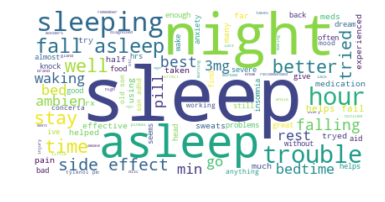

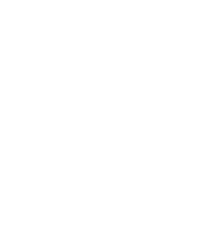

In [170]:
wc = WordCloud( max_words=100, background_color="white").generate(list_cmt[49])
# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(3, 4))
plt.axis("off")
plt.show()

In [171]:
wc.to_file("first_review_melatonin.png")

### sentiment analysis

In [39]:

ndf['comment'] = ndf['comment'].fillna('')
# Convert all the string to lower cases
ndf['comment'] = ndf['comment'].str.lower()
# \s+ means all empty space (\n, \r, \t)
ndf['comment'] = ndf['comment'].apply(lambda x: re.sub('\s+', ' ', x)) # \s all empty spaces + repeat
 # We don't want empty string in our text
ndf = ndf.loc[ndf['comment'] != ""]
ndf['comment'] = ndf['comment'].apply(lambda x: re.sub('[^\w\s]', '', x))




In [ ]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
newStopWords = ['full','comment','show',"taking","take","took","doctor","really","days","one","im","dr","years","used","weeks","vits","vit","units","months","month","year","week","unit","use","colloidal","silver","colloidal silver","started","mg","would","build","help","5htp","htp","put","day","works", "capsule", "work","htp","charcoal","vitamin","oil","dont","care","treatment"]
stop.extend(newStopWords)
list_name = ndf_wc["name"].str.lower().unique()
list_name=list_name.tolist()
stop.extend(list_name)

In [40]:
ndf['comment'] = ndf['comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [49]:
ndf_up

,reason,name,effectiveness,easetouse,comment
0,Depression,5-HTP,4,4,part 2 today 4th still feel sad negative thoug...
1,Anxiety,5-HTP,5,5,effectively replaced ssri 5 moderate gad socia...
2,Anxiety,5-HTP,5,4,depression anxiety experienced results within ...
3,Menopausal symptoms,5-HTP,5,5,200mg tabs morning night makes huge difference...
4,Depression,5-HTP,5,5,grandmother gave try moody throughout daytired...
6,Anxiety,5-HTP,5,5,feel like new person since starting 2 ago noth...
8,Depression,5-HTP,4,4,relatively light still draining depression pas...
9,Depression,5-HTP,4,4,4 far good pretty satisfied product taken 200m...
10,Depression,5-HTP,5,5,great daughters friend told difference using l...
13,Anxiety,5-HTP,5,5,supplement helped long term anxiety depression...


In [48]:
ndf_up = ndf.loc[ndf['effectiveness']>=3]
ndf_up
ndf_down = ndf.loc[ndf['effectiveness']<3]

In [43]:
len(ndf_down)

1131

In [44]:
sample_size = 10000

def sentiment_func(x):
    sentiment = TextBlob(x['comment'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x



In [45]:
sample = ndf_up.sample(5000).apply(sentiment_func, axis=1)

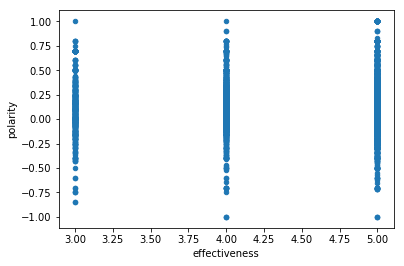

In [47]:
sample.plot.scatter('effectiveness', 'polarity')

In [52]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Soo\AppData\Roaming\nltk_data...


True

In [72]:
import pandas as pd

# read data
reviews_df = pd.read_csv("webmd.csv")
reviews_df.columns=["reason","name","Reviewer_Score","easetouse","review"]
# create the label
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 3 else 0)
# select only relevant columns
reviews_df = reviews_df[["review", "is_bad_review"]]


In [73]:
reviews_df['review'] = reviews_df['review'].fillna('')
# Convert all the string to lower cases
reviews_df["review"] = reviews_df["review"].str.lower()
# \s+ means all empty space (\n, \r, \t)
reviews_df["review"] = reviews_df["review"].apply(lambda x: re.sub('\s+', ' ', x)) # \s all empty spaces + repeat
 # We don't want empty string in our text
reviews_df = reviews_df.loc[reviews_df["review"] != ""]
reviews_df["review"] = reviews_df["review"].apply(lambda x: re.sub('[^\w\s]', '', x))

from nltk.corpus import stopwords


stop = stopwords.words('english')
newStopWords = ['full','comment','show',"taking","take","took","doctor","really","days","one","im","dr","years","started","used","weeks","vits","vit","units","months","month","year","week","unit","use","colloidal","silver","colloidal silver","started","mg","would","build","help","5htp","htp","put","day","works", "capsule", "work","htp","charcoal","vitamin","oil","dont","care","treatment"]
stop.extend(newStopWords)
reviews_df["review"] = reviews_df["review"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [74]:
# return the wordnet object value corresponding to the POS tag
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    newStopWords = ['full','comment','show',"taking","take","took","doctor","really","days","one","im","dr","years","started","used","weeks","vits","vit","units","months","month","year","week","unit","use","colloidal","silver","colloidal silver","started","mg","would","build","help","5htp","htp","put","day","works", "capsule", "work","htp","charcoal","vitamin","oil","dont","care","treatment"]
    stop.extend(newStopWords)
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [75]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [76]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [77]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)


In [78]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [79]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.81956
1    0.18044
Name: is_bad_review, dtype: float64

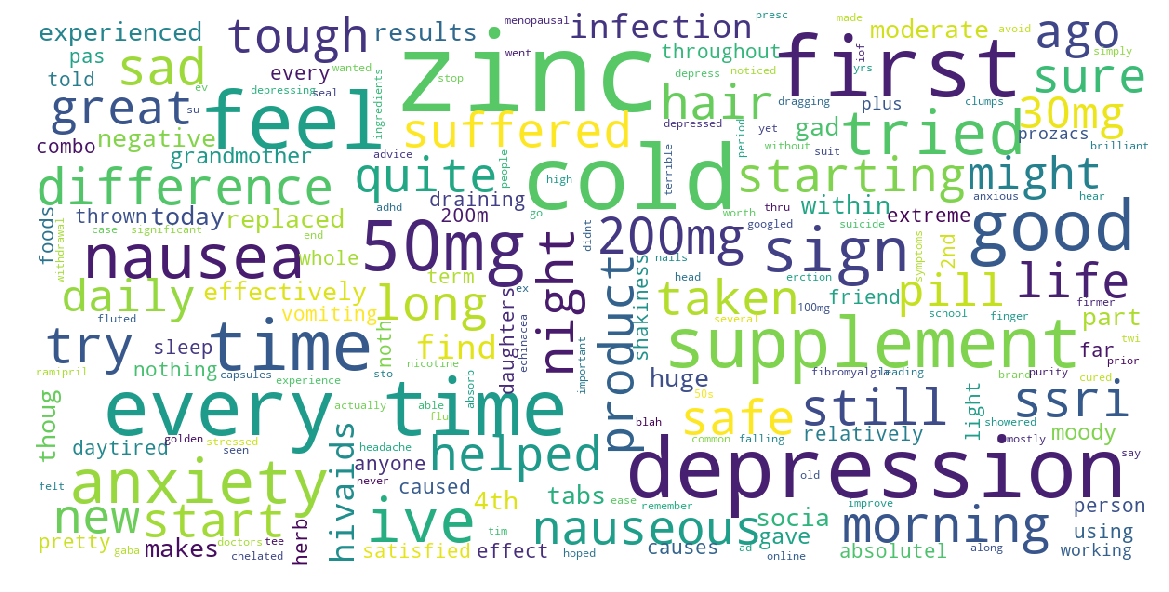

In [80]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review"])

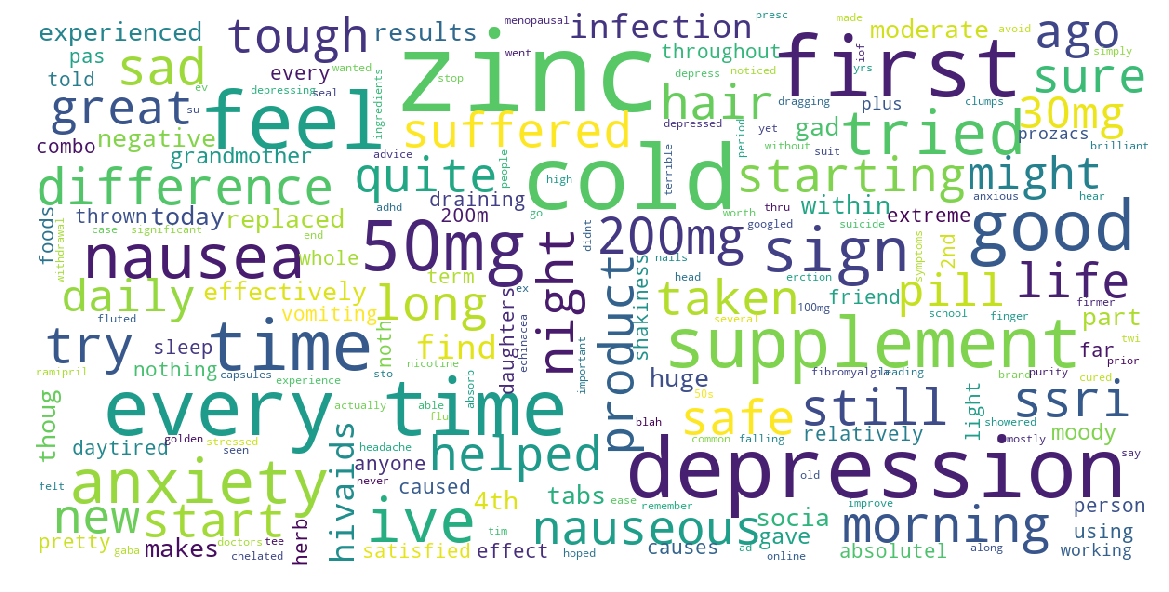

AttributeError: 'NoneType' object has no attribute 'to_file'

In [88]:
show_wordcloud(reviews_df["review"]).to_file("total_comment.png")

In [82]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)


,review,pos
1837,good increase energy good relaxing effect,0.931
5658,great extra energy feeling well,0.907
3683,amazing extra energy strength endurand,0.820
2558,pretty good treatmentoverall id recommend,0.811
558,increased sperm volume increased desire easier...,0.808
1893,muscle size increase strength increase minimal...,0.804
108,searching recommended curious anyone success,0.796
2318,1 feel overall energetic healthy,0.737
518,much calmer relaxed sleep like baby,0.732
250,sleep better noticed mood good well sleep better,0.730


In [83]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
2651,gaba stopped anxiety panic attacks,0.907
3974,sucks another scam waste money,0.818
5200,bad emotional reactiongot severely depressed,0.790
6631,terrible joint pain especially back pain,0.764
534,suffering badly back pain 2days back pain gone,0.762
3997,suspect might caused severe stomach distress,0.732
2925,bad result hate product cheater company viker,0.728
5132,makes heart go wild bad bad bad,0.724
5225,tablet stop gives severe stomach upset,0.712
5210,phosphatidylserine severely negative results b...,0.711


C:\Users\Soo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


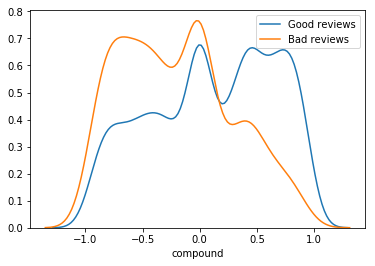

In [84]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)